In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Housing.csv')

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Plotting Price against Area

<AxesSubplot:xlabel='area', ylabel='price'>

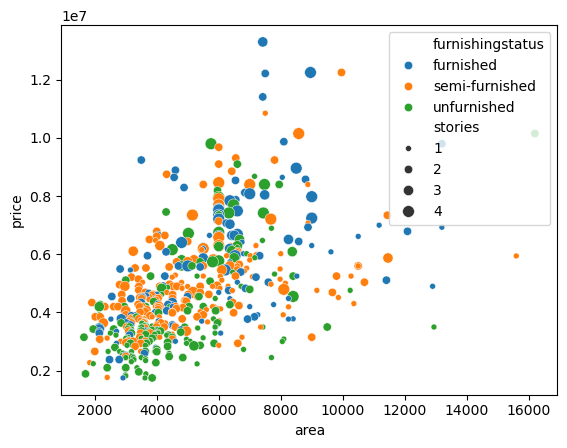

In [4]:
sns.scatterplot(x=data['area'],y=data['price'],hue=data['furnishingstatus'],size=data['stories'])


## Plotting price against No of Bedrooms

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

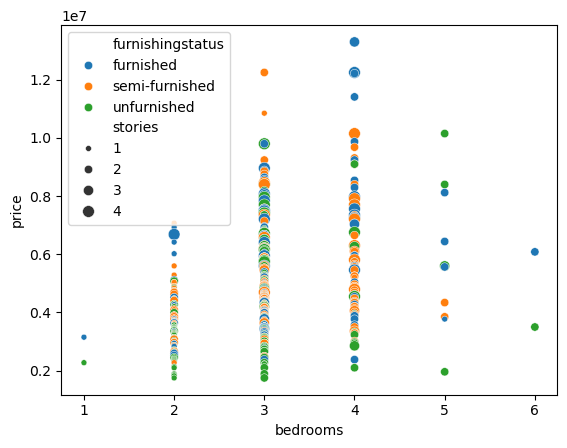

In [5]:
sns.scatterplot(x=data['bedrooms'],y=data['price'],hue=data['furnishingstatus'],size=data['stories'])


## Plotting price against No of Stories in the house

<AxesSubplot:xlabel='stories', ylabel='price'>

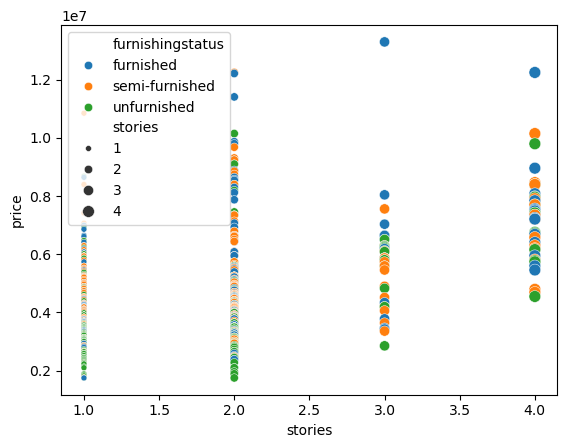

In [6]:
sns.scatterplot(x=data['stories'],y=data['price'],hue=data['furnishingstatus'],size=data['stories'])


### Data in  bedrooms and Stories feature are very small compared to price and area so we need to Apply some preprocessing and Rescale the input features to match their Scales

In [7]:
#importing Standard Scaler from scikit Learn to rescale the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['area', 'price','bedrooms','stories']] = scaler.fit_transform(data[['area', 'price','bedrooms','stories']])


In [8]:
# This function Calculates Mean squared Error
def loss_function(m1,m2,m3,b,points):
    
    total_error = 0
    
    n = len(points)
    
    for i in range (n):
        
        # Three Input features to be used
        X1 = points.iloc[i].area
        X2 = points.iloc[i].bedrooms
        X3 = points.iloc[i].stories
        #Actual Output
        Y  = points.iloc[i].price
        # (m1*X1 + m2*X2 + m3*X3 + b) this is output at some m & b, we subtract it from actual output and square it
        total_error += (Y - (m1*X1 + m2*X2 + m3*X3 + b))**2
    
    # return Mean Squared error
    return (total_error/float(n))
        
        
        

In [9]:
# complete Implementation of gradient Descent
def gradient_descent(curr_m1, curr_m2, curr_m3, curr_b, points, LearningRate):
    
    # variables for Gradient of each parameter
    m1_gradient = 0
    m2_gradient = 0
    m3_gradient = 0
    b_gradient = 0
    
    N = len(points)  # You need to define N before using it
    
    for i in range(len(points)):
        # reading ith input feature from data frame
        X1 = points.iloc[i].area
        X2 = points.iloc[i].bedrooms
        X3 = points.iloc[i].stories
        Y = points.iloc[i].price
        
        # computing gradient of ith Example of dataset
        m1_gradient += (-2/N) * X1 * (Y - (curr_m1*X1 + curr_m2*X2 + curr_m3*X3 + curr_b))
        m2_gradient += (-2/N) * X2 * (Y - (curr_m1*X1 + curr_m2*X2 + curr_m3*X3 + curr_b))
        m3_gradient += (-2/N) * X3 * (Y - (curr_m1*X1 + curr_m2*X2 + curr_m3*X3 + curr_b))
        b_gradient += (-2/N) * (Y - (curr_m1*X1 + curr_m2*X2 + curr_m3*X3 + curr_b))
        
    # Updating the Values of parameters using calculated gradient and previous Values 
    m1 = curr_m1 - (m1_gradient * LearningRate)
    m2 = curr_m2 - (m2_gradient * LearningRate)
    m3 = curr_m3 - (m3_gradient * LearningRate)
    b = curr_b - (b_gradient * LearningRate)
    
    # returning Updated Values
    return m1, m2, m3, b


In [ ]:

m1,m2,m3,b=0,0,0,0
# Learning Rate
L =0.0001
epochs = 10000

# Run Gradient Descent for iteration equal to (epochs)
for i in range (epochs):
    m1,m2,m3,b = gradient_descent(m1,m2,m3,b,data,L)

# print the Values of parameters
print(m1,m2,m3,b)


## Now Observe The change in Output Parameters by CHanging the Learning Rate

In [ ]:

m1,m2,m3,b=0,0,0,0
# Learning Rate
L =0.01
epochs = 10000

# Run Gradient Descent for iteration equal to (epochs)
for i in range (epochs):
    m1,m2,m3,b = gradient_descent(m1,m2,m3,b,data,L)

# print the Values of parameters
print(m1,m2,m3,b)